# Exploring Hacker News Posts

In this project, we'll work with a data set of submissions to popular technology site [Hacker News](https://news.ycombinator.com/). Hacker News is a site where user-submitted stories (known as `"posts"`) are voted and commented upon.

We're specifically interested in posts whose titles begin with either **Ask HN** or **Show HN**. Users submit `Ask HN` posts to ask the Hacker News community a specific question

Likewise, users submit `Show HN` posts to show the Hacker News community a project, product, or just generally something interesting.

We'll compare these two types of posts (i.e Ask HN posts and Show HN Posts) to determine the following:

1. which post is most popular?

2. Do `Ask HN` or `Show HN` receive more comments on average? means on which we received more responase

3. Do posts created at a certain time receive more comments on average? means any specific time to post a news to get more comments

[modin](https://modin.readthedocs.io/en/latest/) modin is fast laibary and 73% function same as in pandas

In [ ]:
!pip install modin[ray]
import numpy as np
import time
import modin.pandas as pd
import matplotlib.pyplot as plt
%%time
news=pd.read_csv("news_posts.csv")
news.head()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
news=pd.read_csv("news_posts.csv")
news.head()

Wall time: 137 ms


,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [3]:
news.count()

id              20100
title           20100
url             17660
num_points      20100
num_comments    20100
author          20100
created_at      20100
dtype: int64

In [4]:
news.columns

Index(['id', 'title', 'url', 'num_points', 'num_comments', 'author',
       'created_at'],
      dtype='object')

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [6]:
news.describe()

,id,num_points,num_comments
count,2.010000e+04,20100.000000,20100.000000
mean,1.131753e+07,50.296070,24.802289
std,6.964399e+05,107.107687,56.107340
min,1.017691e+07,1.000000,1.000000
25%,1.070176e+07,3.000000,1.000000
50%,1.128445e+07,9.000000,3.000000
75%,1.192607e+07,54.000000,21.000000
max,1.257898e+07,2553.000000,1733.000000


In [7]:
news.index

RangeIndex(start=0, stop=20100, step=1)

In [8]:
news.shape

(20100, 7)

**we  need to coonvert date time into date time formate for comparision**

# at the time of reading file we can convert date time
method 1

In [9]:
news=pd.read_csv("news_posts.csv",parse_dates=["created_at"])
news.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,2016-01-26 19:30:00
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,2016-06-23 22:20:00
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,2016-06-17 00:01:00
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,2015-09-30 04:12:00


In [10]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            20100 non-null  int64         
 1   title         20100 non-null  object        
 2   url           17660 non-null  object        
 3   num_points    20100 non-null  int64         
 4   num_comments  20100 non-null  int64         
 5   author        20100 non-null  object        
 6   created_at    20100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


# at the alter stage we can convert date time
method 2

In [11]:
news=pd.read_csv("news_posts.csv")
news["created_at"]=pd.to_datetime(news["created_at"])
news.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,2016-01-26 19:30:00
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,2016-06-23 22:20:00
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,2016-06-17 00:01:00
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,2015-09-30 04:12:00


In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            20100 non-null  int64         
 1   title         20100 non-null  object        
 2   url           17660 non-null  object        
 3   num_points    20100 non-null  int64         
 4   num_comments  20100 non-null  int64         
 5   author        20100 non-null  object        
 6   created_at    20100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


In [13]:
news=news[['created_at','id', 'title', 'url', 'num_points', 'num_comments', 'author']]
news
#column interchange , bring date in first colums

,created_at,id,title,url,num_points,num_comments,author
0,2016-08-04 11:52:00,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte
1,2016-01-26 19:30:00,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2
2,2016-06-23 22:20:00,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash
3,2016-06-17 00:01:00,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna
4,2015-09-30 04:12:00,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell
...,...,...,...,...,...,...,...
20095,2016-08-29 02:22:00,12379592,How Purism Avoids Intels Active Management Tec...,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat
20096,2015-10-06 14:57:00,10339284,YC Application Translated and Broken Down,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano
20097,2016-01-02 00:49:00,10824382,Microkernels are slow and Elvis didn't do no d...,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord
20098,2015-12-15 19:32:00,10739875,How Product Hunt really works,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12


**we need to make 2 or 3 data frame of askHN and showHN and others news to find which post is most popular**

* askhn and showhn comes first in title colum
* but we need to find hn in lower or upper case

In [14]:
news["title"].head(15)
#Ask HN , Show HN

0                             Interactive Dynamic Video
1     How to Use Open Source and Shut the Fuck Up at...
2     Florida DJs May Face Felony for April Fools' W...
3          Technology ventures: From Idea to Enterprise
4     Note by Note: The Making of Steinway L1037 (2007)
5     Title II kills investment? Comcast and other I...
6                        Nuts and Bolts Business Advice
7           Ask HN: How to improve my personal website?
8     Shims, Jigs and Other Woodworking Concepts to ...
9                                That self-appendectomy
10    Crate raises $4M seed round for its next-gen S...
11    Advertising Cannot Maintain the Internet. Here...
12                                       Coding Is Over
13    Show HN: Wio Link  ESP8266 Based Web of Things...
14               Custom Deleters for C++ Smart Pointers
Name: title, dtype: object

In [15]:
ask_bool=news["title"].str.lower().str.startswith("ask hn")
show_bool=news["title"].str.lower().str.startswith("show hn")
#where find it show true, boolen index

In [16]:
ask_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool

In [17]:
show_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool

In [18]:
ask_post=news[ask_bool]
show_post=news[show_bool]

In [19]:
ask_post.head()

,created_at,id,title,url,num_points,num_comments,author
7,2016-08-16 09:55:00,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat
17,2015-11-22 13:43:00,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx
22,2016-05-02 10:14:00,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus
30,2016-08-02 14:20:00,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130
31,2015-10-15 16:38:00,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak


In [20]:
show_post.head()

,created_at,id,title,url,num_points,num_comments,author
13,2015-11-25 14:03:00,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc
39,2015-11-29 22:46:00,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson
46,2016-04-28 18:05:00,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu
84,2016-07-28 07:11:00,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick
97,2016-01-09 20:45:00,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave


In [21]:
other_news=news[~(ask_bool | show_bool)]
other_news.head()
#dalda use for not operator in pandas but in python we use just "not" 

,created_at,id,title,url,num_points,num_comments,author
0,2016-08-04 11:52:00,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte
1,2016-01-26 19:30:00,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2
2,2016-06-23 22:20:00,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash
3,2016-06-17 00:01:00,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna
4,2015-09-30 04:12:00,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell


# find most comments in ask hn post and show hn post

In [22]:
ask_post["num_comments"]

7         6
17       29
22        1
30        3
31       17
         ..
20039    17
20042     3
20045     2
20048     4
20061     2
Name: num_comments, Length: 1744, dtype: int64

In [23]:
show_post["num_comments"]

13        22
39       102
46         1
84         3
97         9
        ... 
19993      6
19999      1
20014     17
20065      1
20070      2
Name: num_comments, Length: 1162, dtype: int64

In [24]:
ask_post_com=ask_post["num_comments"].mean()
show_post_com=show_post["num_comments"].mean()

In [25]:
print(f"ASK:{ask_post_com} , SHOW:{show_post_com}")
#on average askhn get most comments, means if we want to get most comment on post then we should need to place askHn in the start


ASK:14.038417431192661 , SHOW:10.31669535283993


# making a series to show the data 

In [26]:
avg_comment=pd.Series({"ASK":ask_post_com, "SHOW":show_post_com})
avg_comment

ASK     14.038417
SHOW    10.316695
dtype: float64

* we can make bar chart or pie chat
* bar chart comes into picture where we have catagory with absoult values
* pie chart comes into picture where we have % or proportion in data

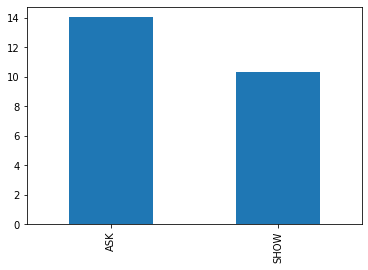

In [27]:
avg_comment.plot.bar()
plt.show()

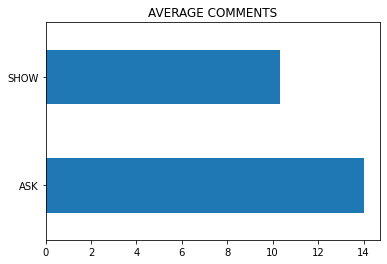

In [28]:
avg_comment.plot.barh(title="AVERAGE COMMENTS")
plt.show()

In [29]:
ask_post=ask_post.copy()
show_post=show_post.copy()
#make a copy of dataframe

# now we check in which hour we get more comment

In [30]:
ask_post.head()

,created_at,id,title,url,num_points,num_comments,author
7,2016-08-16 09:55:00,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat
17,2015-11-22 13:43:00,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx
22,2016-05-02 10:14:00,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus
30,2016-08-02 14:20:00,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130
31,2015-10-15 16:38:00,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak


In [31]:
ask_post["created_at"].dt.hour

7         9
17       13
22       10
30       14
31       16
         ..
20039     9
20042    12
20045     8
20048     1
20061     9
Name: created_at, Length: 1744, dtype: int64

In [32]:
ask_post["hours"]=ask_post["created_at"].dt.hour
ask_post.head()

,created_at,id,title,url,num_points,num_comments,author,hours
7,2016-08-16 09:55:00,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,9
17,2015-11-22 13:43:00,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,13
22,2016-05-02 10:14:00,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,10
30,2016-08-02 14:20:00,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,14
31,2015-10-15 16:38:00,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,16


In [33]:
ask_post.groupby("hours")["num_comments"].mean().sort_values(ascending=False)
#3pm USA time is best time, with askhn post

hours
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64

In [34]:
show_post.head()

,created_at,id,title,url,num_points,num_comments,author
13,2015-11-25 14:03:00,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc
39,2015-11-29 22:46:00,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson
46,2016-04-28 18:05:00,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu
84,2016-07-28 07:11:00,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick
97,2016-01-09 20:45:00,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave


In [35]:
show_post["created_at"].dt.hour

13       14
39       22
46       18
84        7
97       20
         ..
19993     4
19999     3
20014    22
20065     3
20070    11
Name: created_at, Length: 1162, dtype: int64

In [36]:
show_post["hour"]=show_post["created_at"].dt.hour
show_post.head()

,created_at,id,title,url,num_points,num_comments,author,hour
13,2015-11-25 14:03:00,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,14
39,2015-11-29 22:46:00,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson,22
46,2016-04-28 18:05:00,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu,18
84,2016-07-28 07:11:00,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick,7
97,2016-01-09 20:45:00,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave,20


In [37]:
show_post.groupby("hour")["num_comments"].mean().sort_values(ascending=False)

hour
18    15.770492
0     15.709677
14    13.441860
23    12.416667
22    12.391304
12    11.803279
16    11.655914
7     11.500000
11    11.159091
3     10.629630
20    10.200000
19     9.800000
17     9.795699
9      9.700000
13     9.555556
4      9.500000
6      8.875000
1      8.785714
10     8.250000
15     8.102564
21     5.787234
8      4.852941
2      4.233333
5      3.052632
Name: num_comments, dtype: float64

In [38]:
df=pd.DataFrame({'ask':ask_post.groupby("hours")["num_comments"].mean(),"show":show_post.groupby("hour")["num_comments"].mean()})
df.sort_values(["ask"],inplace=True)
df

,ask,show
9,5.577778,9.700000
22,6.746479,12.391304
4,7.170213,9.500000
3,7.796296,10.629630
7,7.852941,11.500000
23,7.985294,12.416667
0,8.127273,15.709677
6,9.022727,8.875000
12,9.410959,11.803279
5,10.086957,3.052632


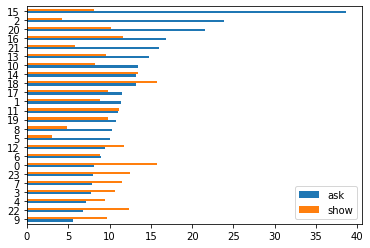

In [39]:
df.plot.barh()
plt.show()

In [40]:
print({"Ask":ask_post.shape,"Show":show_post.shape})

{'Ask': (1744, 8), 'Show': (1162, 8)}


# generate file

In [41]:
ask_post.to_csv("Askhn.csv",index=False) 
#if iindex true then it will generate by-default 1,2,3,4 ---- and if false then it will generate that is column

# making data frame

In [42]:
h_com=ask_post.groupby(["hours"])["num_comments"].mean().sort_values(ascending=False)
h_com

hours
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64

In [43]:
h_com_df=pd.DataFrame(h_com)
h_com_df

,num_comments
hours,
15,38.594828
2,23.810345
20,21.525000
16,16.796296
21,16.009174
13,14.741176
10,13.440678
14,13.233645
18,13.201835


In [44]:
h_com_df.index.name=None


In [45]:
h_com_df

,num_comments
15,38.594828
2,23.810345
20,21.525000
16,16.796296
21,16.009174
13,14.741176
10,13.440678
14,13.233645
18,13.201835
17,11.460000


# print top five hours

In [46]:
for index,value in h_com_df.head().iterrows():
    print(index)

15
2
20
16
21


In [47]:
for index,value in h_com_df.head().iterrows():
    print(value)

num_comments    38.594828
Name: 15, dtype: float64
num_comments    23.810345
Name: 2, dtype: float64
num_comments    21.525
Name: 20, dtype: float64
num_comments    16.796296
Name: 16, dtype: float64
num_comments    16.009174
Name: 21, dtype: float64


In [48]:
for index,value in h_com_df.head().iterrows():
    print(index,value)

15 num_comments    38.594828
Name: 15, dtype: float64
2 num_comments    23.810345
Name: 2, dtype: float64
20 num_comments    21.525
Name: 20, dtype: float64
16 num_comments    16.796296
Name: 16, dtype: float64
21 num_comments    16.009174
Name: 21, dtype: float64


In [49]:
for index,value in h_com_df.head().iterrows():
    print(index,value.values)

15 [38.59482759]
2 [23.81034483]
20 [21.525]
16 [16.7962963]
21 [16.00917431]


In [50]:
for index,value in h_com_df.head().iterrows():
    print(index,value.values[0])

15 38.5948275862069
2 23.810344827586206
20 21.525
16 16.796296296296298
21 16.009174311926607


In [51]:
for index,value in h_com_df.head().iterrows():
    hours=index
    comment=value.values[0]
    print(f"There are {comment:.2f} comment at {hours}")

There are 38.59 comment at 15
There are 23.81 comment at 2
There are 21.52 comment at 20
There are 16.80 comment at 16
There are 16.01 comment at 21


In [52]:
number=12783333338
f"My is {number:,}"

'My is 12,783,333,338'

In [53]:
number=12783333338.9209
f"My is {number:,.2f}"

'My is 12,783,333,338.92'

In [54]:
import pandas as pd 

# Creating a data frame 
df = pd.DataFrame([['Animal', 'Baby', 'Cat', 'Dog', 'Elephant', 'Frog', 'Gragor']]) 

# Itering over the data frame rows 
# using df.iterrows() 
itr = next(df.iterrows())[1]
itr 


0      Animal
1        Baby
2         Cat
3         Dog
4    Elephant
5        Frog
6      Gragor
Name: 0, dtype: object

In [58]:
ask_post.head()

,created_at,id,title,url,num_points,num_comments,author,hours
7,2016-08-16 09:55:00,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,9
17,2015-11-22 13:43:00,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,13
22,2016-05-02 10:14:00,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,10
30,2016-08-02 14:20:00,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,14
31,2015-10-15 16:38:00,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,16


In [62]:
for i,v in ask_post.iterrows():
    print(i,v[0])

7 2016-08-16 09:55:00
17 2015-11-22 13:43:00
22 2016-05-02 10:14:00
30 2016-08-02 14:20:00
31 2015-10-15 16:38:00
49 2015-09-26 23:23:00
51 2016-04-22 12:24:00
65 2015-11-16 09:22:00
70 2016-02-24 17:57:00
118 2016-06-04 17:17:00
136 2015-09-19 17:04:00
150 2015-09-22 13:16:00
170 2016-06-21 15:45:00
171 2016-01-13 21:17:00
176 2015-10-04 21:27:00
180 2016-01-25 20:27:00
181 2015-10-27 02:47:00
185 2016-01-19 12:01:00
190 2016-03-22 02:05:00
199 2015-09-08 14:04:00
201 2016-08-28 18:06:00
212 2016-07-20 13:44:00
227 2016-09-12 16:52:00
228 2016-02-29 17:52:00
236 2016-04-18 15:28:00
237 2015-12-28 14:38:00
246 2016-04-04 03:34:00
271 2016-01-15 21:47:00
305 2015-11-19 05:33:00
311 2015-12-20 03:59:00
312 2015-10-15 21:34:00
328 2016-02-26 19:20:00
331 2016-08-02 18:00:00
346 2016-02-28 01:24:00
349 2016-01-13 09:12:00
380 2016-05-06 01:14:00
391 2016-06-23 13:59:00
397 2016-04-30 17:21:00
400 2015-10-20 19:21:00
405 2015-10-25 15:09:00
407 2016-05-04 14:14:00
422 2015-12-23 20:48:00
42

5070 2016-07-09 23:37:00
5086 2016-04-08 20:20:00
5091 2016-08-21 17:30:00
5092 2016-04-20 21:38:00
5112 2015-10-12 21:46:00
5116 2015-12-25 03:25:00
5123 2016-04-11 22:16:00
5130 2016-09-13 06:25:00
5166 2015-11-24 04:26:00
5224 2016-07-16 15:01:00
5237 2016-03-23 00:38:00
5247 2016-05-13 14:45:00
5248 2015-09-21 14:57:00
5262 2016-05-25 14:16:00
5265 2016-07-22 11:16:00
5268 2015-09-26 20:33:00
5315 2016-01-26 16:04:00
5330 2016-07-14 06:31:00
5333 2016-01-03 18:57:00
5351 2016-05-20 10:39:00
5361 2016-04-07 22:55:00
5363 2016-04-20 05:08:00
5393 2016-09-13 01:58:00
5394 2015-10-01 11:38:00
5402 2016-02-03 16:46:00
5408 2016-05-28 14:53:00
5422 2015-11-10 04:52:00
5441 2015-10-05 15:35:00
5445 2016-09-16 21:19:00
5451 2016-02-25 02:57:00
5452 2016-07-19 08:52:00
5465 2016-02-27 13:17:00
5475 2016-01-14 22:42:00
5481 2016-05-14 14:06:00
5492 2016-07-13 03:25:00
5495 2016-05-02 22:54:00
5509 2016-04-06 03:19:00
5520 2016-05-03 17:24:00
5522 2016-01-13 16:40:00
5538 2016-06-25 15:35:00


9495 2015-12-22 12:54:00
9501 2016-06-28 10:14:00
9511 2016-06-11 16:08:00
9544 2016-08-24 12:07:00
9546 2016-06-15 18:21:00
9549 2015-10-23 02:22:00
9558 2015-12-03 14:07:00
9572 2016-02-06 19:39:00
9574 2015-12-23 01:46:00
9594 2016-07-13 19:14:00
9598 2016-05-28 10:33:00
9603 2015-09-28 07:05:00
9625 2016-07-26 21:03:00
9634 2016-03-05 09:56:00
9658 2016-08-18 18:13:00
9662 2016-05-04 08:10:00
9668 2016-02-03 16:55:00
9670 2016-08-05 20:59:00
9679 2016-02-27 05:33:00
9680 2016-05-25 19:59:00
9693 2016-05-26 22:09:00
9702 2015-09-30 03:39:00
9706 2015-11-09 14:36:00
9736 2016-09-12 08:33:00
9737 2016-09-17 15:58:00
9741 2016-03-21 19:21:00
9747 2016-06-28 04:41:00
9755 2016-08-02 20:27:00
9756 2016-04-25 17:07:00
9769 2016-08-16 14:59:00
9774 2015-11-07 21:58:00
9786 2016-04-08 21:13:00
9788 2015-12-02 16:05:00
9793 2016-01-27 00:18:00
9814 2016-06-23 20:18:00
9818 2015-11-20 00:25:00
9849 2016-04-27 16:59:00
9858 2016-04-13 16:06:00
9863 2016-08-18 10:50:00
9864 2015-11-09 17:31:00


17509 2015-11-04 15:49:00
17510 2016-01-15 21:26:00
17519 2016-07-12 03:21:00
17528 2015-10-03 01:39:00
17534 2016-09-26 01:17:00
17536 2015-11-12 20:51:00
17541 2015-10-21 16:20:00
17566 2015-10-28 05:02:00
17574 2016-01-04 18:24:00
17577 2015-09-16 17:53:00
17578 2015-11-22 11:23:00
17584 2015-12-28 16:59:00
17593 2016-07-30 01:03:00
17606 2015-09-17 23:45:00
17612 2015-10-02 05:26:00
17613 2016-03-06 08:50:00
17617 2016-07-26 13:12:00
17620 2016-04-01 19:38:00
17624 2016-07-20 15:55:00
17645 2016-05-09 03:03:00
17658 2016-08-11 15:25:00
17680 2016-07-28 15:45:00
17709 2015-11-11 19:39:00
17710 2015-12-09 00:01:00
17717 2016-04-09 18:43:00
17725 2016-08-09 20:37:00
17727 2016-09-16 13:16:00
17738 2015-12-02 23:29:00
17748 2015-11-20 05:28:00
17758 2016-05-01 16:03:00
17768 2016-01-20 00:59:00
17770 2016-04-11 23:36:00
17772 2016-08-27 05:56:00
17773 2016-01-05 02:17:00
17804 2016-02-21 06:49:00
17833 2016-02-19 23:10:00
17841 2016-04-29 16:10:00
17869 2015-12-27 21:52:00
17878 2015-1